<a href="https://colab.research.google.com/github/ArpitaM1730/ML-PRJ/blob/main/cancer_detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [38]:
!unzip /content/cancer_dt.zip

Archive:  /content/cancer_dt.zip
  inflating: cancer_dt/brain_tumor/gg (1).jpg  
  inflating: cancer_dt/brain_tumor/gg (10).jpg  
  inflating: cancer_dt/brain_tumor/gg (100).jpg  
  inflating: cancer_dt/brain_tumor/gg (101).jpg  
  inflating: cancer_dt/brain_tumor/gg (102).jpg  
  inflating: cancer_dt/brain_tumor/gg (103).jpg  
  inflating: cancer_dt/brain_tumor/gg (104).jpg  
  inflating: cancer_dt/brain_tumor/gg (105).jpg  
  inflating: cancer_dt/brain_tumor/gg (106).jpg  
  inflating: cancer_dt/brain_tumor/gg (107).jpg  
  inflating: cancer_dt/brain_tumor/gg (108).jpg  
  inflating: cancer_dt/brain_tumor/gg (109).jpg  
  inflating: cancer_dt/brain_tumor/gg (11).jpg  
  inflating: cancer_dt/brain_tumor/gg (110).jpg  
  inflating: cancer_dt/brain_tumor/gg (111).jpg  
  inflating: cancer_dt/brain_tumor/gg (112).jpg  
  inflating: cancer_dt/brain_tumor/gg (113).jpg  
  inflating: cancer_dt/brain_tumor/gg (114).jpg  
  inflating: cancer_dt/brain_tumor/gg (115).jpg  
  inflating: cancer_d

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# count the number of images in the respective classes 0-Brain Tumor and 1-Healthy
ROOT_DIR = "/content/cancer_dt"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('brain_tumor', 2475), ('no_tumor', 395)])

In [ ]:
# we will create a tr folder
if not os.path.exists("./tr"):
  os.mkdir("./tr")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./tr/"+dir)

    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(70/100*number_of_images[dir])-5),
                                replace = False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join("./tr/"+dir)

      os.remove(O)
else:
  print("Folder exists")

In [ ]:
def dataFolder(p, split):
  # we will create a tr, val, or test folder

  if not os.path.exists("./"+ p):
   os.mkdir("./"+ p)

   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+ p +"/"+dir)

     # Get the list of images in the current directory
     images = os.listdir(os.path.join(ROOT_DIR, dir))

     # Calculate the desired sample size, ensuring it doesn't exceed the number of images
     sample_size = min(math.floor(split*number_of_images[dir]), len(images))

     # If sample size is less than 5, adjust accordingly
     if sample_size < 5 and len(images) >= 5:
         sample_size = 5

     # Select images randomly without replacement, considering the available images
     for img in np.random.choice(a = images, size = sample_size, replace = False):
       O = os.path.join(ROOT_DIR, dir, img)
       D = os.path.join("./"+ p,dir)
       shutil.copy(O,D)
       # Remove only if creating 'tr' folder to prevent removing images multiple times
       if p == 'tr':
          os.remove(O)
  else:
    print( f"{p} Folder exists")

In [43]:
dataFolder("tr",0.7)

In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

In [44]:
%rm -rf ML-PROJECTS

preparing our data using data generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages(path):
  image_data = ImageDataGenerator(
      shear_range = 0.1,
      preprocessing_function = preprocess_input,
      zoom_range = 0.1,
      horizontal_flip = True)
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary')
  return image

In [ ]:
path = "/content/tr"
train_data = preprocessingImages(path)

Found 872 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'brain_tumor': 0, 'no_tumor': 1}

In [ ]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(
      preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary')
  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 430 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 430 images belonging to 2 classes.


#Model Training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Model , load_model
from keras.applications.mobilenet import MobileNet,preprocess_input
import keras

In [ ]:
base_model = MobileNet(input_shape = (224,224,3),
                       include_top = False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
for layer in base_model.layers :
 layer.trainable = False

In [25]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = 'sigmoid')(X)

model = Model(base_model.input,X)

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [27]:
model.compile(optimizer = 'rmsprop',
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [29]:
#Early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

#model check point
mc = ModelCheckpoint(monitor = 'val_accuracy',filepath = "./best_model.h5", verbose = 1, save_best_only = True)

cb = [es,mc]

In [30]:
hists = model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    callbacks=cb,
    validation_data=val_data,
    validation_steps=16
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.6992 - loss: 5.3907
Epoch 1: val_accuracy improved from -inf to 0.95116, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7078 - loss: 5.3353 - val_accuracy: 0.9512 - val_loss: 0.3469
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9337 - loss: 0.2715
Epoch 2: val_accuracy improved from 0.95116 to 0.97907, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.9337 - loss: 0.2723 - val_accuracy: 0.9791 - val_loss: 0.1567
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.9113 - loss: 0.6385
Epoch 3: val_accuracy did not improve from 0.97907
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 759ms/step - accuracy: 0.9096 - loss: 0.6451 - val_accuracy: 0.9767 - val_loss: 0.1833
Epoch 4/30
4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9544 - loss: 0.3295
Epoch 4: val_accuracy improved from 0.97907 to 0.98140, saving model to ./best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.9616 - loss: 0.2704 - val_accuracy: 0.9814 - val_loss: 0.1346
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9638 - loss: 0.3191
Epoch 5: val_accuracy did not improve from 0.98140
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.9648 - loss: 0.3020 - val_accuracy: 0.9744 - val_loss: 0.1780
Epoch 5: early stopping


In [31]:
model = load_model("/content/best_model.h5")

In [32]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is = {acc*100} %")

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9824 - loss: 0.0615
The accuracy of the model is = 97.90697693824768 %


In [33]:
h = hists.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

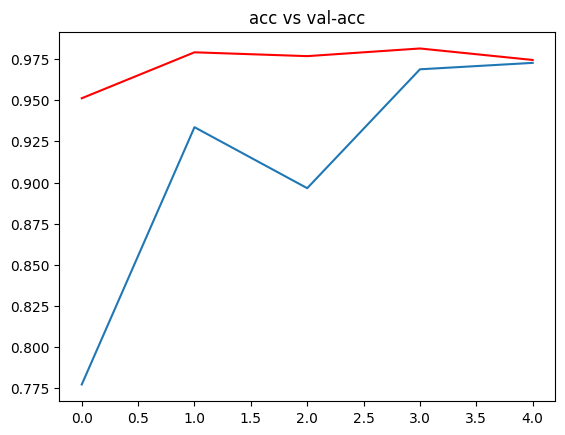

In [34]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = "red")
plt.title("acc vs val-acc")
plt.show()

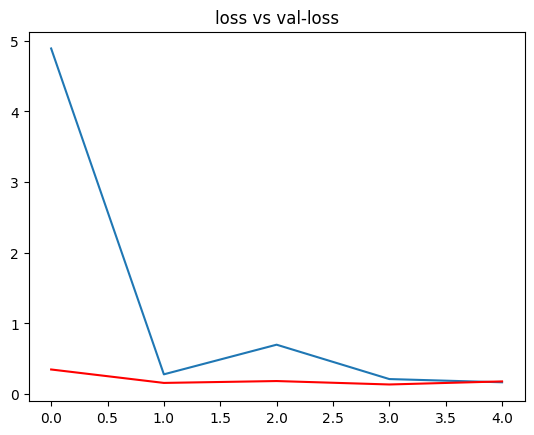

In [35]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = "red")
plt.title("loss vs val-loss")
plt.show()

In [36]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The person has brain tumor


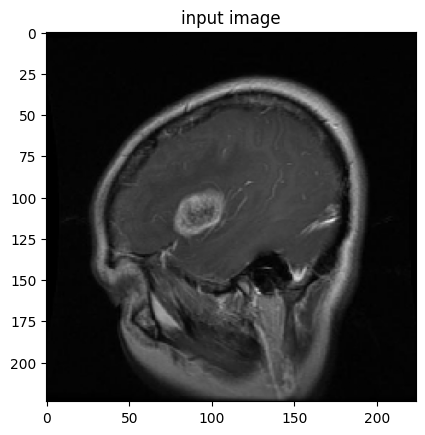

In [40]:
path ="/content/cancer_dt/brain_tumor/gg (103).jpg"
img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))

if pred > 0.5:
  print("The person is healthy")
else:
  print("The person has brain tumor")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

